In [106]:
import numpy as np
import cv2
from PIL import Image
import pytesseract as tess
import matplotlib.pyplot as plt

In [107]:
#preprocessing pipeline
def preprocess(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgBlurred = cv2.GaussianBlur(gray, (5,5), 0)
    sobelx = cv2.Sobel(imgBlurred,cv2.CV_8U,1,0,ksize=3)
    ret2,threshold_img = cv2.threshold(sobelx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return threshold_img

In [108]:
#
def extract_contours(threshold_img):
    element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
    morph_img_threshold = threshold_img.copy()
    cv2.morphologyEx(src=threshold_img, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
    contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
    return morph_img_threshold, contours

In [109]:
def cleanAndRead(img,contours):
    for i,cnt in enumerate(contours):
        min_rect = cv2.minAreaRect(cnt)
        #print(validateRotationAndRatio(min_rect))
        if validateRotationAndRatio(min_rect):

            x,y,w,h = cv2.boundingRect(cnt)
            plate_img = img[y:y+h,x:x+w]
    
            if(isMaxWhite(plate_img)):
                #print(isMaxWhite(plate_img))
                clean_plate, rect = cleanPlate(plate_img)
                if rect:
                    x1,y1,w1,h1 = rect
                    x,y,w,h = x+x1,y+y1,w1,h1
                    plate_im = Image.fromarray(clean_plate)
                
                    text = tess.image_to_string(plate_im, lang='eng')
                    print("Detected Text : ", text)
                    cleaned_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
                    return plate_im, cleaned_img

In [110]:
def validateRotationAndRatio(rect):
    (x, y), (width, height), rect_angle = rect

    if(width>height):
        angle = -rect_angle
    else:
        angle = 90 + rect_angle

    if angle>15:
        return False

    if height == 0 or width == 0:
        return False

    area = height*width
    if not ratioCheck(area,width,height):
        return False
    else:
        return True

In [111]:
def ratioCheck(area, width, height):
    ratio = float(width) / float(height)
    if ratio < 1:
        ratio = 1 / ratio
    aspect = 4.7272
    min = 15 * aspect * 15  # minimum area
    max = 125 *aspect * 125  # maximum area

    rmin = 3
    rmax = 6

    if (area < min or area > max) or (ratio < rmin or ratio > rmax):
        #print(area, ratio)
        return False
    return True

In [112]:
def isMaxWhite(plate):
    avg = np.mean(plate)
    if(avg>=115):
        return True
    else:
        return False

In [124]:
def cleanPlate(plate):
    gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    thresh = cv2.dilate(gray, kernel, iterations = 1)

    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if contours:
        areas = [cv2.contourArea(c) for c in contours]
        max_index = np.argmax(areas)

        max_cnt = contours[max_index]
        max_cntArea = areas[max_index]
        x,y,w,h = cv2.boundingRect(max_cnt)
#         cleaned_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
#         plt.imshow(cleaned_img, 'gray')
        if not ratioCheck(max_cntArea,w,h):
            return plate,None

        cleaned_final = thresh[y:y+h, x:x+w]
        return cleaned_final,[x,y,w,h]

    else:
        return plate, None

Detected Text :  KL ESK TTI:


Text(0.5,1,'Function Test')

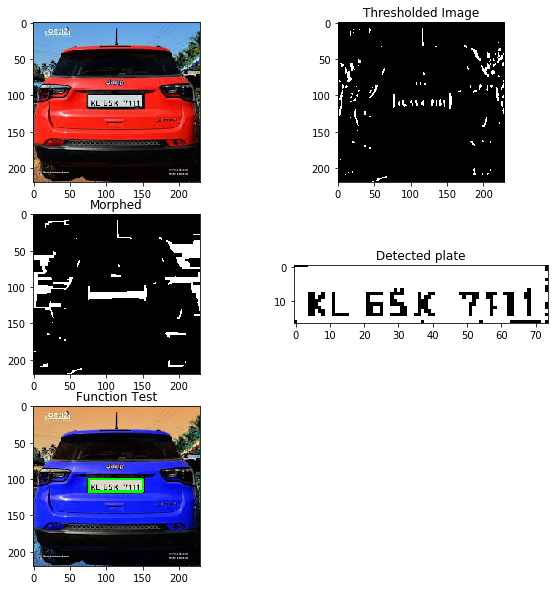

In [114]:
img = cv2.imread("car1.jpg")
plt.figure(figsize = (10,10))
plt.subplot(3,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
threshold_img = preprocess(img)
plt.subplot(3,2,2)
plt.imshow(threshold_img, 'gray')
plt.title("Thresholded Image")
morphed, contours= extract_contours(threshold_img)
plt.subplot(3,2,3)
plt.imshow(morphed, 'gray')
plt.title('Morphed')
plate_img, cleaned_final = cleanAndRead(img,contours)
plt.subplot(3,2,4)
plt.imshow(plate_img, 'gray')
plt.title("Detected plate")
plt.subplot(3,2,5)
plt.imshow(cleaned_final)
plt.title("Function Test")

Detected Text :  DL ic M 047i}


Text(0.5,1,'Function Test')

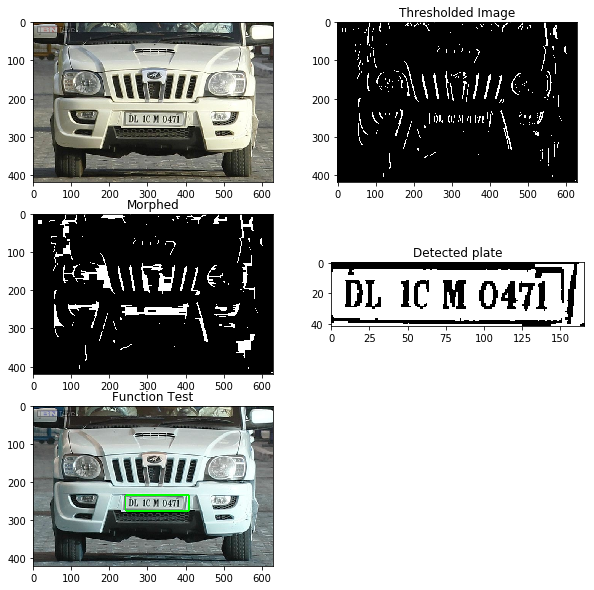

In [115]:
img = cv2.imread("car2.jpg")
plt.figure(figsize = (10,10))
plt.subplot(3,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
threshold_img = preprocess(img)
plt.subplot(3,2,2)
plt.imshow(threshold_img, 'gray')
plt.title("Thresholded Image")
morphed, contours= extract_contours(threshold_img)
plt.subplot(3,2,3)
plt.imshow(morphed, 'gray')
plt.title('Morphed')
plate_img, cleaned_final = cleanAndRead(img,contours)
plt.subplot(3,2,4)
plt.imshow(plate_img, 'gray')
plt.title("Detected plate")
plt.subplot(3,2,5)
plt.imshow(cleaned_final)
plt.title("Function Test")

Detected Text :  [MHOZEP 1543


Text(0.5,1,'Function Test')

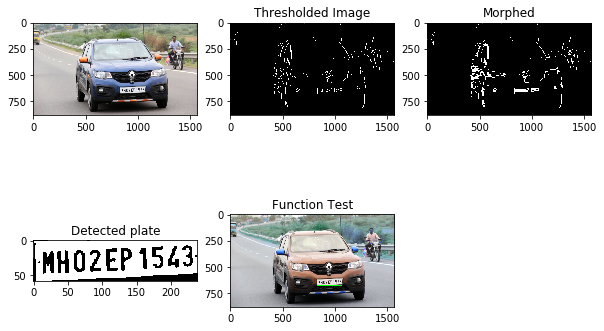

In [116]:
img = cv2.imread("car3.jpg")
plt.figure(figsize = (10,10))
plt.subplot(3,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
threshold_img = preprocess(img)
plt.subplot(3,3,2)
plt.imshow(threshold_img, 'gray')
plt.title("Thresholded Image")
morphed, contours= extract_contours(threshold_img)
plt.subplot(3,3,3)
plt.imshow(morphed, 'gray')
plt.title('Morphed')
plate_img, cleaned_final = cleanAndRead(img,contours)
plt.subplot(3,3,4)
plt.imshow(plate_img, 'gray')
plt.title("Detected plate")
plt.subplot(3,3,5)
plt.imshow(cleaned_final)
plt.title("Function Test")

Detected Text :  [MHOZEP 1543


Text(0.5,1,'Function Test')

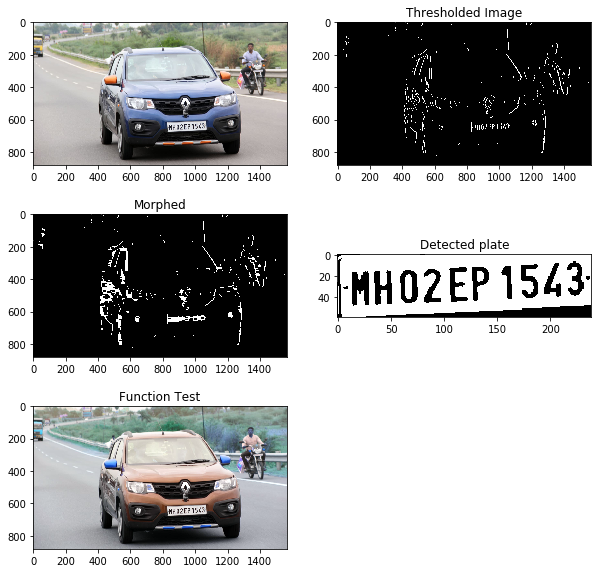

In [117]:
img = cv2.imread("car3.jpg")
plt.figure(figsize = (10,10))
plt.subplot(3,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
threshold_img = preprocess(img)
plt.subplot(3,2,2)
plt.imshow(threshold_img, 'gray')
plt.title("Thresholded Image")
morphed, contours= extract_contours(threshold_img)
plt.subplot(3,2,3)
plt.imshow(morphed, 'gray')
plt.title('Morphed')
plate_img, cleaned_final = cleanAndRead(img,contours)
plt.subplot(3,2,4)
plt.imshow(plate_img, 'gray')
plt.title("Detected plate")
plt.subplot(3,2,5)
plt.imshow(cleaned_final)
plt.title("Function Test")

Detected Text :  aay


Text(0.5,1,'Function Test')

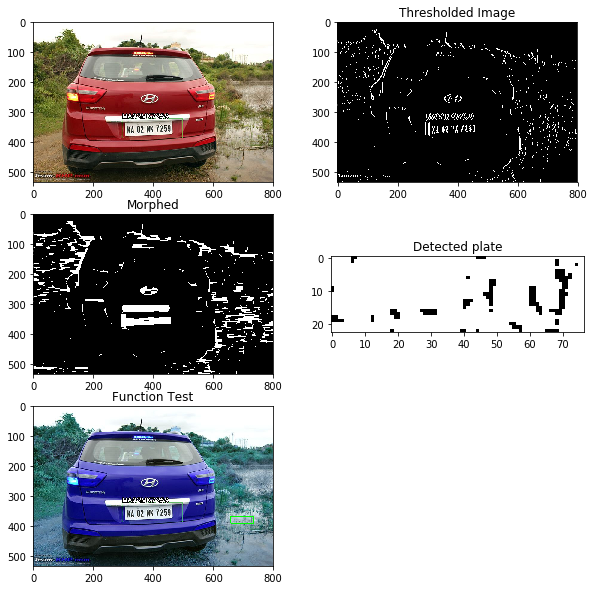

In [118]:
img = cv2.imread("car4.jpg")
plt.figure(figsize = (10,10))
plt.subplot(3,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
threshold_img = preprocess(img)
plt.subplot(3,2,2)
plt.imshow(threshold_img, 'gray')
plt.title("Thresholded Image")
morphed, contours= extract_contours(threshold_img)
plt.subplot(3,2,3)
plt.imshow(morphed, 'gray')
plt.title('Morphed')
plate_img, cleaned_final = cleanAndRead(img,contours)
plt.subplot(3,2,4)
plt.imshow(plate_img, 'gray')
plt.title("Detected plate")
plt.subplot(3,2,5)
plt.imshow(cleaned_final)
plt.title("Function Test")

Detected Text :  MHO1A¥SB66


Text(0.5,1,'Function Test')

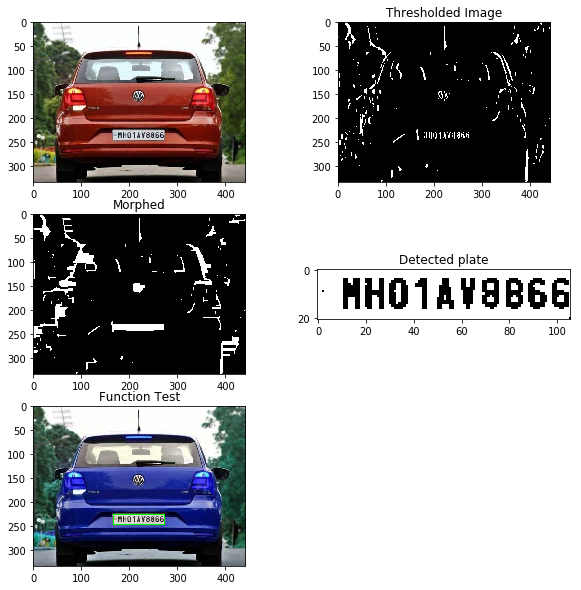

In [119]:
img = cv2.imread("car5.jpg")
plt.figure(figsize = (10,10))
plt.subplot(3,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
threshold_img = preprocess(img)
plt.subplot(3,2,2)
plt.imshow(threshold_img, 'gray')
plt.title("Thresholded Image")
morphed, contours= extract_contours(threshold_img)
plt.subplot(3,2,3)
plt.imshow(morphed, 'gray')
plt.title('Morphed')
plate_img, cleaned_final = cleanAndRead(img,contours)
plt.subplot(3,2,4)
plt.imshow(plate_img, 'gray')
plt.title("Detected plate")
plt.subplot(3,2,5)
plt.imshow(cleaned_final)
plt.title("Function Test")

TypeError: cannot unpack non-iterable NoneType object

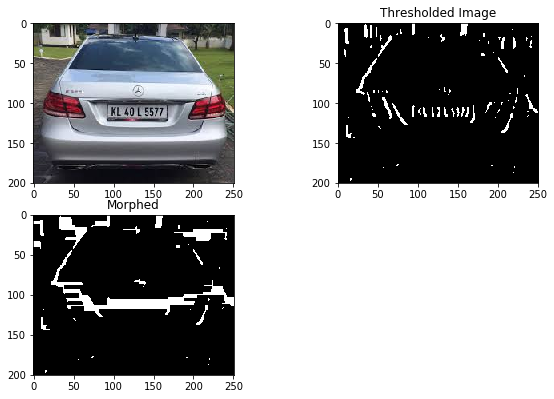

In [120]:
img = cv2.imread("car6.jpg")
plt.figure(figsize = (10,10))
plt.subplot(3,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
threshold_img = preprocess(img)
plt.subplot(3,2,2)
plt.imshow(threshold_img, 'gray')
plt.title("Thresholded Image")
morphed, contours= extract_contours(threshold_img)
plt.subplot(3,2,3)
plt.imshow(morphed, 'gray')
plt.title('Morphed')
plate_img, cleaned_final = cleanAndRead(img,contours)
plt.subplot(3,2,4)
plt.imshow(plate_img, 'gray')
plt.title("Detected plate")
plt.subplot(3,2,5)
plt.imshow(cleaned_final)
plt.title("Function Test")

TypeError: cannot unpack non-iterable NoneType object

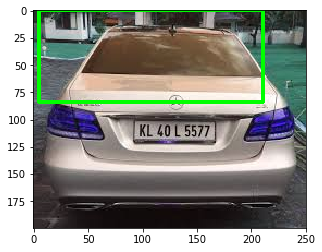

In [123]:
img = cv2.imread("car6.jpg")
# plt.figure(figsize = (10,10))
# plt.subplot(3,2,1)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
threshold_img = preprocess(img)
# plt.subplot(3,2,2)
# plt.imshow(threshold_img, 'gray')
# plt.title("Thresholded Image")
morphed, contours= extract_contours(threshold_img)
# plt.subplot(3,2,3)
# plt.imshow(morphed, 'gray')
# plt.title('Morphed')
plate_img, cleaned_final = cleanAndRead(img,contours)
# plt.subplot(3,2,4)
# plt.imshow(plate_img, 'gray')
# plt.title("Detected plate")
# plt.subplot(3,2,5)
# plt.imshow(cleaned_final)
# plt.title("Function Test")